| **Inicio** | **atrás 12** | **Siguiente 14** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./12_Validacion_Cruzada.ipynb)| [⏩](./14_GINI.ipynb)|

# **13. K-means (o K-medias) para detección de Clusters: Algoritmo e implementación con Python**

## **Introducción**

**K-means** es un popular algoritmo de clustering utilizado para agrupar datos en clusters o grupos basados en similitudes. El objetivo principal del algoritmo es particionar un conjunto de puntos de datos en K grupos distintos, donde cada punto pertenece al grupo cuyo centroide (punto medio) está más cerca. El algoritmo K-means es especialmente útil cuando se quiere explorar la estructura de los datos y agrupar puntos similares juntos.

Aquí hay una explicación paso a paso del algoritmo K-means junto con un ejemplo de implementación en Python usando la librería `scikit-learn`.

**Paso 1: Elegir el número de clusters (K)**
Antes de aplicar el algoritmo K-means, debemos decidir cuántos clusters queremos identificar. Este valor se representa como K y puede ser seleccionado de forma subjetiva o utilizando métodos como "Elbow Method" o "Silhouette Method" para encontrar un valor óptimo.

**Paso 2: Inicialización de centroides**
El algoritmo K-means comienza seleccionando K centroides iniciales, donde cada centroide representa el punto medio de un cluster.

**Paso 3: Asignación de puntos a clusters**
En este paso, cada punto de datos se asigna al cluster cuyo centroide es el más cercano. Esto se basa en la distancia euclidiana entre los puntos y los centroides.

**Paso 4: Actualización de centroides**
Una vez que todos los puntos se han asignado a clusters, los centroides se recalculan tomando la media de todos los puntos en el cluster.

**Paso 5: Repetición de pasos 3 y 4**
Los pasos 3 y 4 se repiten hasta que los centroides de los clusters ya no cambien significativamente o se alcance un número máximo de iteraciones.

**Implementación en Python:**

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


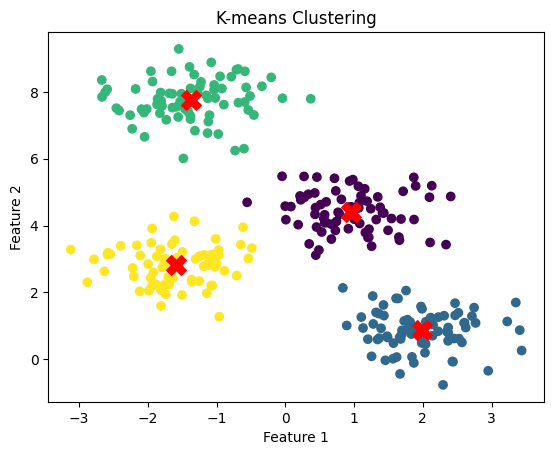

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generar datos sintéticos
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Crear una instancia del modelo KMeans con K=4
kmeans = KMeans(n_clusters=4)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Predecir las etiquetas de cluster para cada punto
labels = kmeans.predict(X)

# Obtener los centroides
centroids = kmeans.cluster_centers_

# Visualizar los clusters y centroides
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

En este ejemplo, generamos datos sintéticos usando `make_blobs`, creamos un modelo KMeans con K=4, ajustamos el modelo a los datos, predijimos las etiquetas de cluster para cada punto y finalmente visualizamos los clusters y los centroides. El resultado es una representación gráfica de cómo el algoritmo K-means ha agrupado los puntos en clusters.

## **Contexto y algoritmo**

El algoritmo K-means es un método de agrupación no supervisado utilizado en el campo del aprendizaje automático y la minería de datos para encontrar patrones ocultos en los datos y agrupar puntos similares en clusters. El objetivo es dividir un conjunto de datos en K grupos o clusters, de tal manera que los puntos dentro de un mismo cluster sean más similares entre sí que con los puntos en otros clusters. Este algoritmo es especialmente útil cuando se desconoce la estructura subyacente de los datos y se busca explorar patrones y relaciones entre los puntos.

**Contexto:**

Imagina que tienes un conjunto de datos que contiene información sobre los hábitos de compra de los clientes en una tienda en línea. Cada entrada en el conjunto de datos representa un cliente y sus características de compra, como la cantidad de productos comprados, el gasto total, la frecuencia de compra, etc. Sin embargo, no sabes cómo se agrupan naturalmente estos clientes en términos de sus hábitos de compra.

Aquí es donde entra en juego el algoritmo K-means. Puedes aplicar K-means para agrupar a los clientes en segmentos específicos según sus patrones de compra. Esto podría ayudarte a tomar decisiones de marketing más informadas y dirigidas, ya que podrías personalizar ofertas y promociones para cada grupo de clientes de manera más efectiva.

**Algoritmo:**

1. **Inicialización de centroides:** Selecciona K centroides iniciales en el espacio de características. Estos centroides representan los puntos medios iniciales de los clusters.

2. **Asignación de puntos a clusters:** Para cada punto en el conjunto de datos, calcula la distancia entre el punto y cada uno de los centroides. Asigna el punto al cluster cuyo centroide está más cerca.

3. **Actualización de centroides:** Después de asignar todos los puntos a clusters, calcula nuevos centroides para cada cluster tomando el promedio de todos los puntos en ese cluster.

4. **Repetición:** Repite los pasos 2 y 3 hasta que los centroides ya no cambien significativamente o se alcance un número máximo de iteraciones.

5. **Resultado:** Una vez que el algoritmo converge, cada punto estará asignado a un cluster específico, y los centroides representarán los puntos medios de esos clusters. Los clusters resultantes representan grupos de puntos similares en función de las características proporcionadas.

El algoritmo K-means puede ser sensible a la inicialización de los centroides y puede converger a soluciones locales subóptimas. Por lo tanto, es común ejecutar el algoritmo varias veces con diferentes inicializaciones y seleccionar la solución con la mejor función objetivo (suma de las distancias al cuadrado de los puntos a sus centroides).

El ejemplo de implementación que proporcioné en mi respuesta anterior te da una idea de cómo se realiza el proceso paso a paso utilizando Python y la librería `scikit-learn`. Puedes adaptar este ejemplo para diferentes conjuntos de datos y números de clusters según tus necesidades.

## **Creación de modelo K-means**

Aquí tienes un ejemplo detallado de cómo crear y aplicar un modelo K-means utilizando Python y la librería `scikit-learn`. Supongamos que tenemos un conjunto de datos de puntos bidimensionales y queremos agruparlos en clusters utilizando el algoritmo K-means.

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


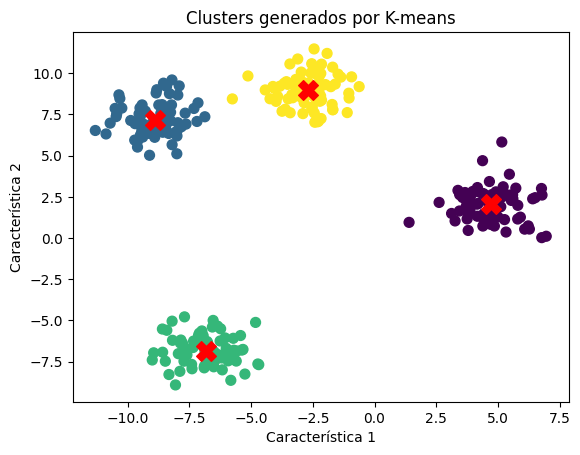

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generar datos de ejemplo con 4 clusters
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# Crear y ajustar el modelo K-means
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Obtener las etiquetas de cluster asignadas a cada punto
labels = kmeans.labels_

# Obtener las coordenadas de los centroides
centroids = kmeans.cluster_centers_

# Graficar los puntos y los centroides
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Clusters generados por K-means')
plt.show()

**Explicación paso a paso:**

1. Importamos las librerías necesarias: `numpy` para generar datos y operaciones matemáticas, `matplotlib` para graficar y `KMeans` de `sklearn.cluster` para crear y ajustar el modelo K-means.

2. Generamos datos de ejemplo utilizando la función `make_blobs`. Esta función crea clusters artificiales para fines de ilustración.

3. Creamos una instancia del modelo K-means con `n_clusters` especificado (en este caso, 4 clusters).

4. Ajustamos el modelo K-means a los datos utilizando el método `fit()`.

5. Obtenemos las etiquetas de cluster asignadas a cada punto con el atributo `labels_`.

6. Obtenemos las coordenadas de los centroides con el atributo `cluster_centers_`.

7. Graficamos los puntos y los centroides utilizando `plt.scatter()`. Los puntos se colorearán según las etiquetas de cluster asignadas, y los centroides se marcarán en rojo con el símbolo "X".

8. Finalmente, mostramos la gráfica con `plt.show()`.

Este ejemplo ilustra cómo aplicar el algoritmo K-means para agrupar puntos en clusters. Puedes personalizar el número de clusters, los datos de entrada y otras propiedades según tus necesidades. Recuerda que K-means es una técnica de agrupación no supervisada y puede adaptarse a diferentes tipos de datos y aplicaciones.

## **Visualización de clusters**

Por supuesto, la visualización es una parte importante al trabajar con algoritmos de clustering como K-means. Aquí tienes un ejemplo detallado de cómo visualizar los clusters generados por el algoritmo K-means utilizando Python y la librería `matplotlib`:

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


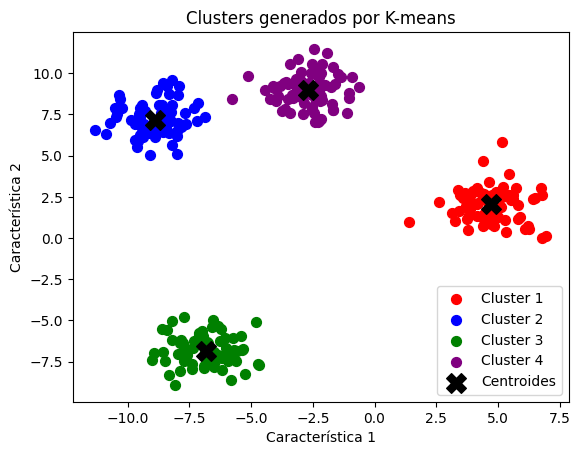

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generar datos de ejemplo con 4 clusters
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# Crear y ajustar el modelo K-means
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Obtener las etiquetas de cluster asignadas a cada punto
labels = kmeans.labels_

# Obtener las coordenadas de los centroides
centroids = kmeans.cluster_centers_

# Crear una paleta de colores para los clusters
colors = ['red', 'blue', 'green', 'purple']

# Graficar los puntos coloreados por cluster
for i in range(num_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label=f'Cluster {i+1}', s=50)

# Graficar los centroides en negro
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroides')

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Clusters generados por K-means')
plt.legend()
plt.show()

**Explicación paso a paso:**

1. Importamos las librerías necesarias: `numpy` para generar datos y operaciones matemáticas, `matplotlib` para graficar y `KMeans` de `sklearn.cluster` para crear y ajustar el modelo K-means.

2. Generamos datos de ejemplo utilizando la función `make_blobs`.

3. Creamos y ajustamos el modelo K-means de la misma manera que en el ejemplo anterior.

4. Obtenemos las etiquetas de cluster asignadas a cada punto y las coordenadas de los centroides.

5. Creamos una lista de colores para los clusters. En este ejemplo, utilizamos colores predefinidos, pero puedes personalizarlos según tu preferencia.

6. Utilizamos un bucle para recorrer cada cluster y graficar los puntos de ese cluster con el color correspondiente.

7. Graficamos los centroides en negro y los marcamos con el símbolo "X".

8. Agregamos etiquetas y título a la gráfica, y mostramos la leyenda utilizando `plt.legend()`.

9. Finalmente, mostramos la gráfica con `plt.show()`.

Esta visualización te permitirá comprender mejor cómo los puntos se agrupan en clusters y cómo se ubican los centroides en relación con los datos.

## **Determina k con el método del codo**

El método del codo es una técnica comúnmente utilizada para determinar el número óptimo de clusters (valor de k) en el algoritmo K-means. Implica ejecutar el algoritmo K-means en el conjunto de datos para diferentes valores de k y calcular la suma de los cuadrados de las distancias entre los puntos y los centroides de sus clusters asignados. Luego, se grafica esta suma de distancias en función del número de clusters y se busca el punto en el gráfico que se asemeje a un "codo", es decir, donde la curva empiece a aplanarse.

A continuación se muestra cómo realizar el método del codo para determinar k utilizando Python y la librería `matplotlib`:

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

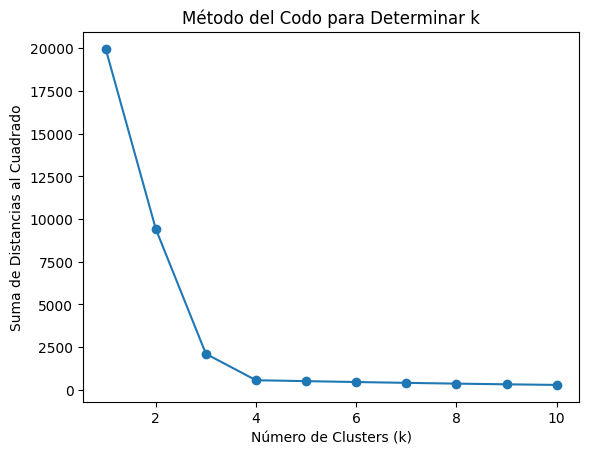

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generar datos de ejemplo con 4 clusters
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# Calcular la suma de los cuadrados de las distancias para diferentes valores de k
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Graficar la suma de las distancias en función de k
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de Distancias al Cuadrado')
plt.title('Método del Codo para Determinar k')
plt.show()

**Explicación paso a paso:**

1. Generamos datos de ejemplo utilizando la función `make_blobs`.

2. Creamos una lista vacía llamada `distortions` para almacenar las sumas de distancias al cuadrado.

3. Utilizamos un bucle para recorrer diferentes valores de k (en este caso, de 1 a 10).

4. En cada iteración, creamos y ajustamos un modelo K-means con el valor de k actual, y luego calculamos la suma de las distancias al cuadrado utilizando el atributo `inertia_`.

5. Agregamos la suma de distancias al cuadrado a la lista `distortions`.

6. Graficamos los valores de k en el eje x y las sumas de distancias al cuadrado en el eje y utilizando `plt.plot()`.

7. Etiquetamos los ejes y agregamos un título a la gráfica.

8. Mostramos la gráfica con `plt.show()`.

En la gráfica resultante, busca el punto donde la curva empiece a aplanarse. Ese es el "codo" y el valor de k en ese punto puede considerarse como el número óptimo de clusters para tus datos. En el ejemplo, podrás observar visualmente cuál es el valor de k que parece más apropiado para la partición de los datos.

| **Inicio** | **atrás 12** | **Siguiente 14** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./12_Validacion_Cruzada.ipynb)| [⏩](./14_GINI.ipynb)|